In [24]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
conn = sqlite3.connect('factbook.db')
%matplotlib inline

q = 'select * from sqlite_master where type = "table";'
pd.read_sql_query(q, conn)



,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = 'select * from facts limit 5'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q3 = '''select min(population) min_pop, max(population) max_pop,
min(population_growth) min_pop_gr,max(population_growth) max_pop_gr
from facts'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_gr,max_pop_gr
0,0,7256490011,0.0,4.02


In [4]:
q4 = '''select name country, population from facts
where population = 0'''
pd.read_sql_query(q4, conn)

,country,population
0,Antarctica,0


This actually makes sense

In [5]:
q5 = '''select name country, population from facts
where population = (select max(population) from facts)'''
pd.read_sql_query(q5, conn)

,country,population
0,World,7256490011


This also makes sense

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27fdbd9b00>,
      dtype=object)

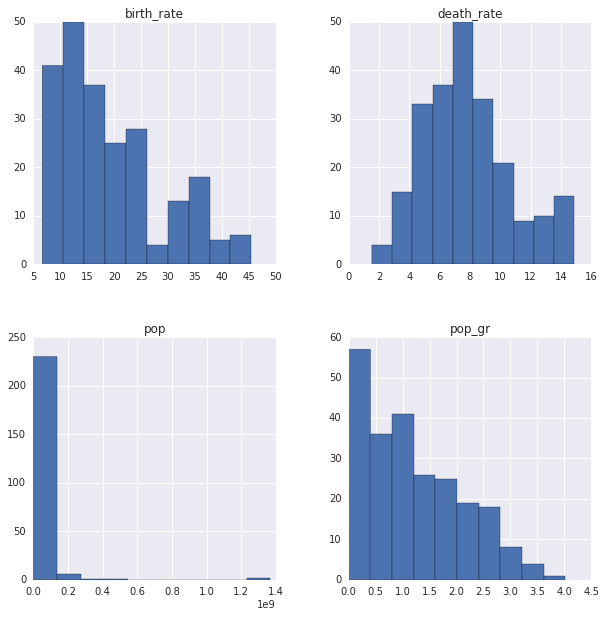

In [25]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

q6 = '''select population pop, population_growth pop_gr, birth_rate, death_rate
from facts
where population not in (0,(select max(population) from facts))'''
# where population in (0,(select max(population from facts)))'''
pd.read_sql_query(q6, conn).hist(ax = ax)

the birthrate seems to be significantly higher than the death rate this is reflected by the population gr